# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Sean StClair
# [Github Link](https://github.com/SMStclair/Sean_mod6_webscraping)

Perform the tasks described in the Markdown cells below. When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (.py), then import and run the appropriate code to answer the question.

In [34]:
# Imports
from bs4 import BeautifulSoup
import requests
import html5lib
import pickle
import matplotlib.pyplot as plt
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

### Question 1:
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [35]:
# get article
article_html = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

#parse HTML content with bs4
parser = 'html5lib'

soup = BeautifulSoup(article_html.content, parser)

with open('article_html.pkl', 'wb') as f:
    pickle.dump(soup, f)
    print("HTML saved to article_html.pkl.")

HTML saved to article_html.pkl.


### Question 2:
Read in your article's html source from the file you created in question 1 and print it's text (use .get_text())

In [36]:
with open('article_html.pkl', 'rb') as f:
    article_html = pickle.load(f)

article_html = soup.find('article')

print(article_html.get_text())



    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

### Question 3:
Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [37]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_html.get_text())

tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
tokens_freq = Counter(tokens)
most_common_tokens = tokens_freq.most_common(5)

print("Top 5 Most Frequent Tokens, With Count:")
for tokens, freq in most_common_tokens:
    print(f"Token: '{tokens}', Count: {freq}")

Top 5 Most Frequent Tokens, With Count:
Token: 'laser', Count: 35
Token: 'headlights', Count: 19
Token: 'headlight', Count: 11
Token: 'technology', Count: 10
Token: 'led', Count: 10


### Question 4:
Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [38]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
mostFreqlemmas = lemma_freq.most_common(5)

print("Top 5 Most Frequent Lemmas, With Count:")
for lemma, freq in mostFreqlemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 Most Frequent Lemmas, With Count:
Lemma: 'laser', Frequency: 40
Lemma: 'headlight', Frequency: 28
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


### Question 5:
- Define the following methods:
    - score_sentence_by_token(sentence, interesting_token) that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    - score_sentence_by_lemma(sentence, interesting_lemmas) that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence

You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well). Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [46]:
cool_tokens = {token for token, _ in mostFreqtokens}
cool_lemmas = {lemma for lemma, _ in mostFreqlemmas}

first_sentence = next(doc.sents)

# Count occurrences of cool tokens and lemmas in the first sentence
token_count = sum(1 for token in first_sentence if token.text.lower() in cool_tokens)
lemma_count = sum(1 for token in first_sentence if token.lemma_ in cool_lemmas)

# Calculate the scores directly
token_score = token_count / len(first_sentence) if len(first_sentence) > 0 else 0
lemma_score = lemma_count / len(first_sentence) if len(first_sentence) > 0 else 0

# Clean the sentence string (use .strip() for cleaner and efficient whitespace handling)
sent_str = str(first_sentence).replace('\n', '').strip()

# Print results
print(f"Token count: {token_count}, Lemma count: {lemma_count}")
print(f"Sentence: {sent_str}")
print(f"Token Score for the first sentence: {token_score}")
print(f"Lemma Score for the first sentence: {lemma_score}")


Token count: 4, Lemma count: 2
Sentence: How Laser Headlights Work                                    130 Comments                                        by:                Lewin Day                                        March 22, 2021                                                                                        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Token Score for the first sentence: 0.09302325581395349
Lemma Score for the first sentence: 0.046511627906976744


### Question 6:
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

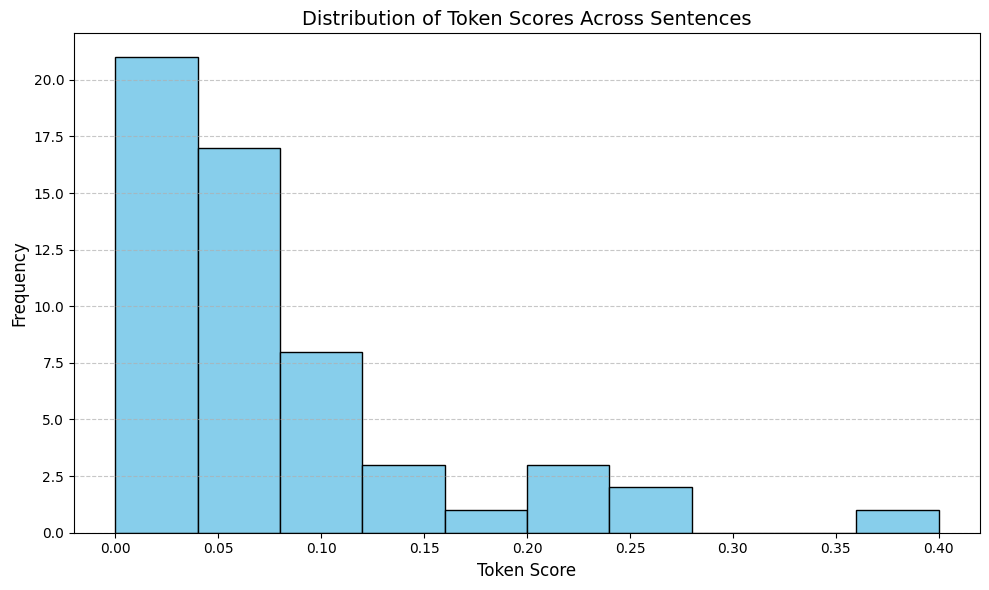

In [ ]:
def score_sentence_by_token(sentence, interesting_tokens):
    return sum(1 for token in sentence if token.text.lower() in interesting_tokens) / len(sentence) if len(sentence) > 0 else 0


token_scores = [score_sentence_by_token(sentence, cool_tokens) for sentence in doc.sents]


plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Token Scores Across Sentences", fontsize=14)
plt.xlabel("Token Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# The most common range appears to be between 0.00-0.25 from the histogram.

### Question 7:
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

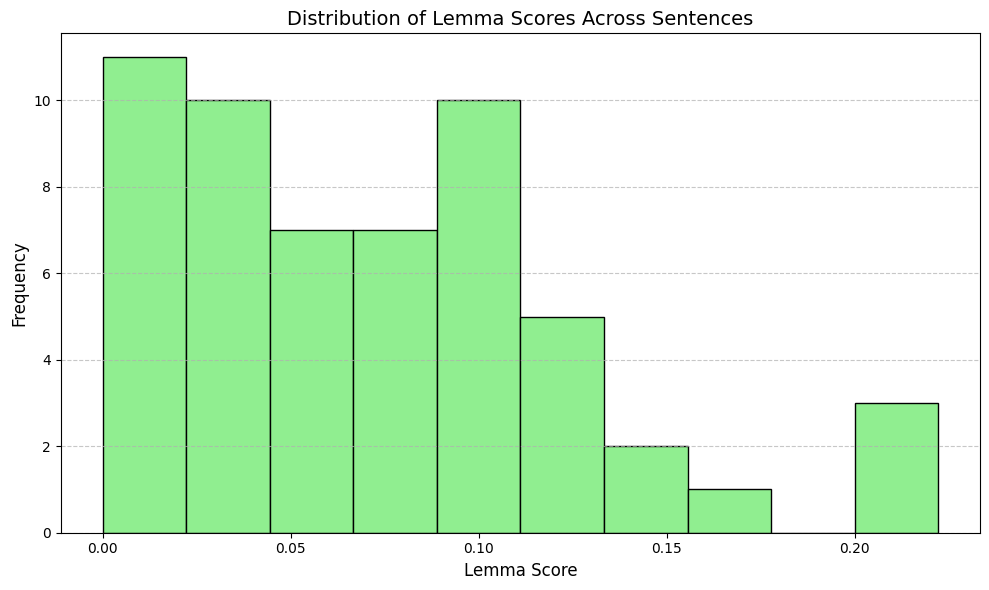

In [51]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    return sum(1 for token in sentence if token.lemma_ in interesting_lemmas) / len(sentence) if len(sentence) > 0 else 0

lemma_scores = [score_sentence_by_lemma(sentence, cool_lemmas) for sentence in doc.sents]

plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=10, color='lightgreen', edgecolor='black')
plt.title("Distribution of Lemma Scores Across Sentences", fontsize=14)
plt.xlabel("Lemma Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# The most common range of scores from the histogram would be between 0.00 and 0.2


### Question 8:
Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words? How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

1. If we only wanted to consider nouns as interesting words, only led would be ommitted.

2. To change the code to only consider nouns I would change the coding as follows:

tokens = [token.text.lower() for token in doc if token.pos_ in ['NOUN', 'PROPN'] and token.is_alpha and not token.is_stop]